<a href="https://colab.research.google.com/github/RayenBoukhchina/Social-Media-Engagement-Predictor/blob/main/TP3_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df= pd.read_csv('/content/sentimentdataset.csv')

In [5]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [10]:
df.describe(include='object')

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Country
count,732,732,732,732,732,732,732
unique,707,279,683,685,4,697,115
top,"A compassionate rain, tears of empathy fallin...",Positive,2019-04-05 17:30:00,WinterWarmth,Instagram,#Hopeful #SeedsOfOptimism,USA
freq,3,44,3,3,258,3,59


In [11]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


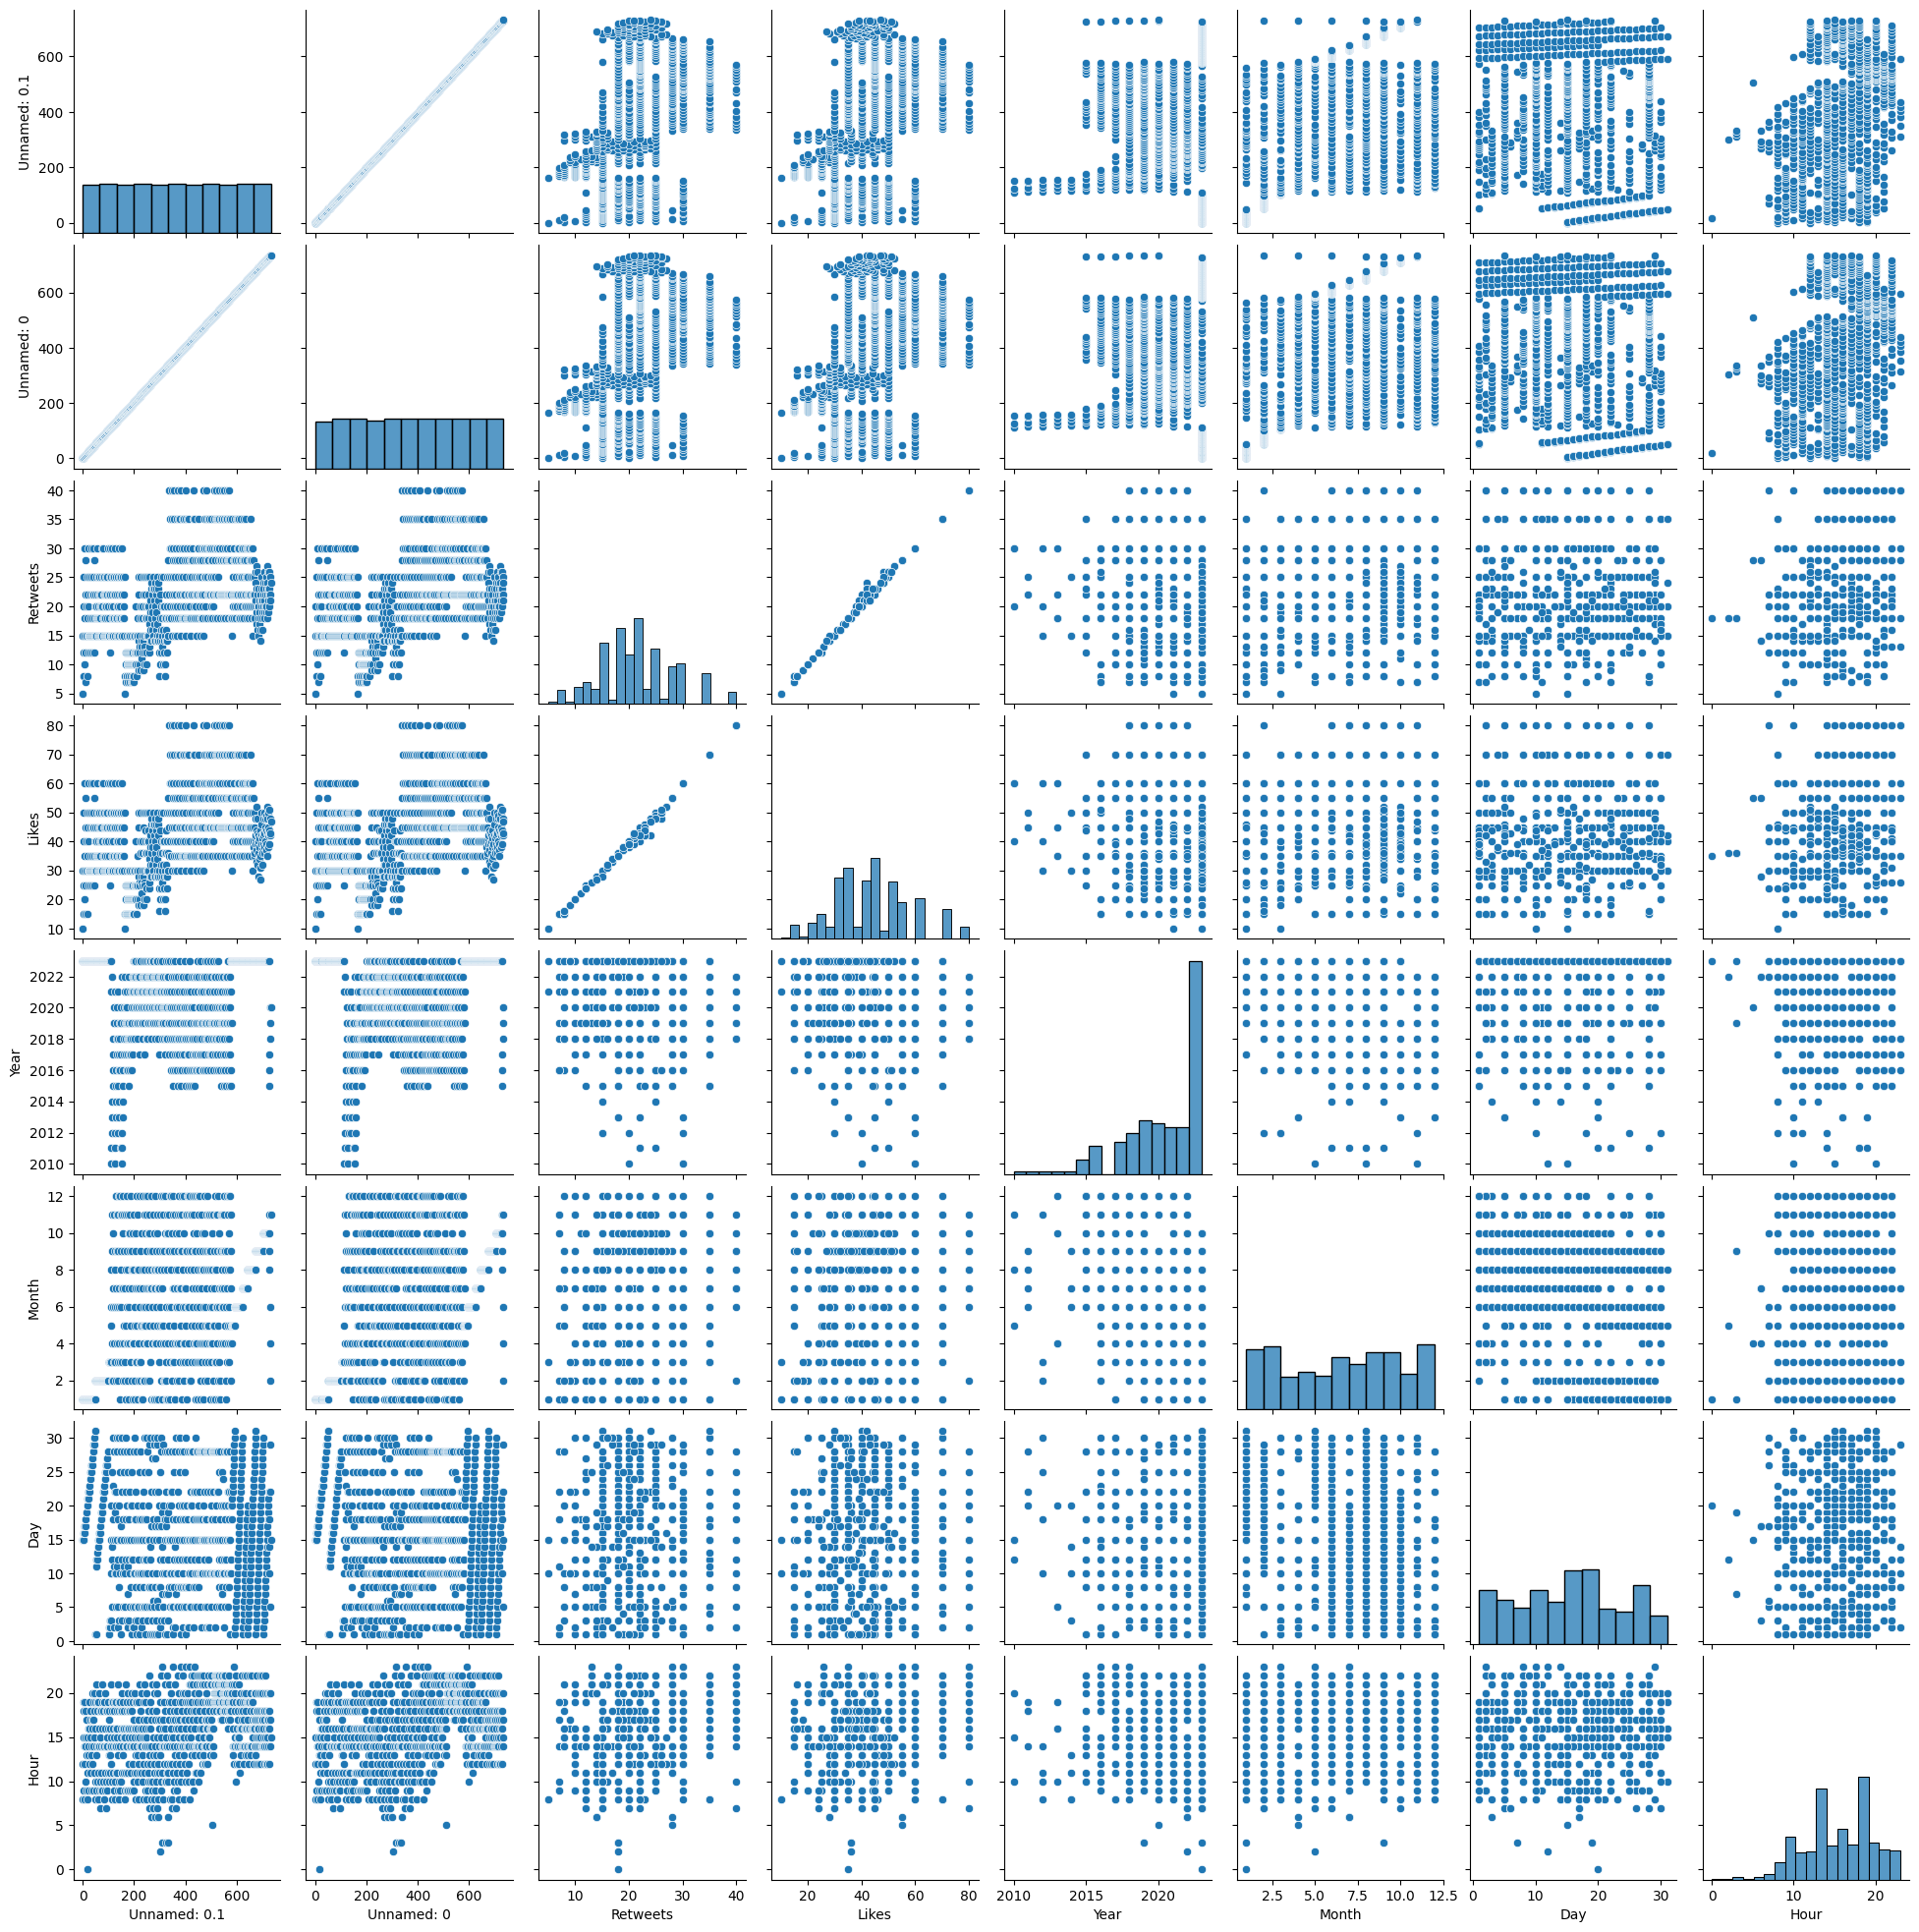

In [31]:
sns.pairplot(df)

In [38]:
features = ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']
target = 'Likes'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
# Construction du modèle
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(features)]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compilation du modèle
model.compile(
    optimizer='adam',
    loss='mse',  # Mean Squared Error pour la régression
    metrics=['mae', 'mse']  # Mean Absolute Error et Mean Squared Error
)

# Affichage de l'architecture du modèle
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1896.0145 - mae: 41.2522 - mse: 1896.0145 - val_loss: 1999.7157 - val_mae: 42.3418 - val_mse: 1999.7157
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1853.9551 - mae: 40.5938 - mse: 1853.9551 - val_loss: 1870.3662 - val_mae: 40.7371 - val_mse: 1870.3662
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1673.3278 - mae: 38.3177 - mse: 1673.3278 - val_loss: 1685.7134 - val_mae: 38.3874 - val_mse: 1685.7134
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1518.5835 - mae: 36.0037 - mse: 1518.5835 - val_loss: 1428.8890 - val_mae: 35.0438 - val_mse: 1428.8890
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1269.9425 - mae: 32.5917 - mse: 1269.9425 - val_loss: 1107.5347 - val_mae: 30.4300 - val_mse: 1107.5347
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 916.9898 - mae: 27.2332 - mse: 916.9898 - val_loss: 755.4937 - val_mae: 24.5411 - val_mse: 755.4937
Epoch 7/100
15/15 ━━━━━━━

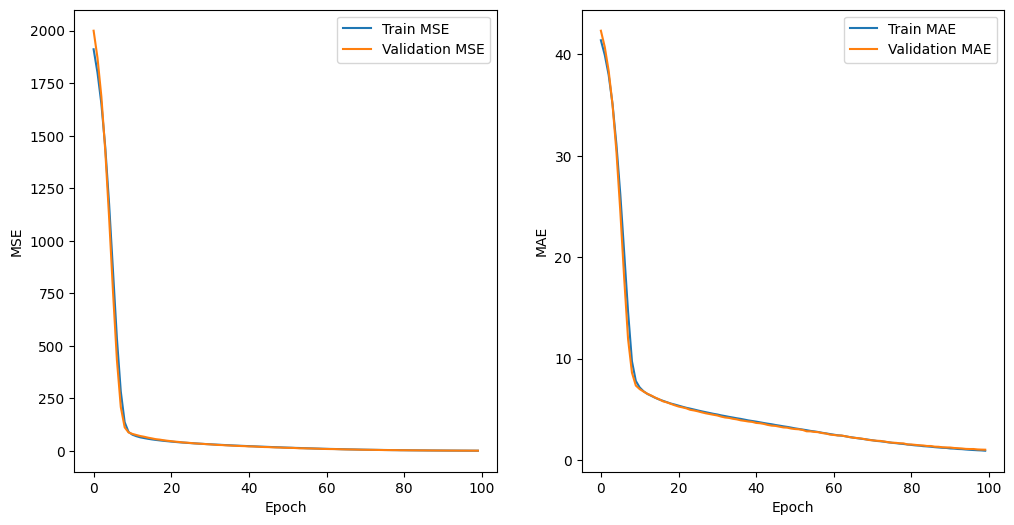

In [39]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['mse'], label='Train MSE')
    plt.plot(history.history['val_mse'], label='Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

plot_history(history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE: 1.12
R² Score: 0.99


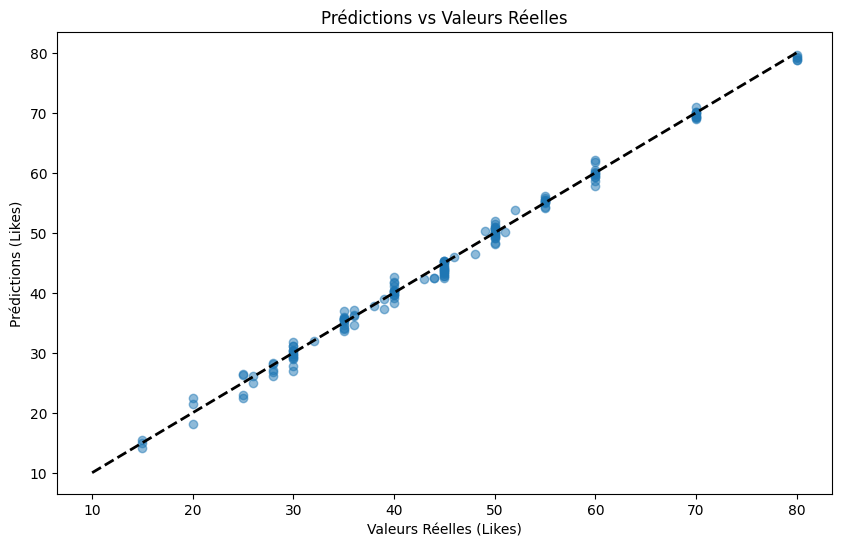

In [40]:
test_predictions = model.predict(X_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)

print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('Valeurs Réelles (Likes)')
plt.ylabel('Prédictions (Likes)')
plt.title('Prédictions vs Valeurs Réelles')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [41]:
#Vérifier le surapprentissage
train_predictions = model.predict(X_train).flatten()
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_r2 = r2_score(y_train, train_predictions)
print(f"\nPerformance sur l'entraînement : RMSE={train_rmse:.2f}, R²={train_r2:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Performance sur l'entraînement : RMSE=1.21, R²=0.99


In [42]:
# Correction garantie sans fuite
safe_features = ['Retweets', 'Year', 'Month', 'Day', 'Hour',
                'sentiment_Positive', 'sentiment_Negative']

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Séparation initiale AVANT tout preprocessing
X = df.drop(columns=[target, 'Text', 'User'])  # Exclure la cible et colonnes inutiles
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Préprocessing séparé
numeric_features = ['Retweets', 'Year', 'Month', 'Day', 'Hour']
categorical_features = ['Sentiment', 'Platform']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Nouveau modèle
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(numeric_features) + len(categorical_features)]),
    layers.Dropout(0.3),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1967.1654 - mae: 42.1049 - val_loss: 2107.6829 - val_mae: 43.6380
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1931.9644 - mae: 41.7049 - val_loss: 2086.8457 - val_mae: 43.4061
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1869.5588 - mae: 40.8605 - val_loss: 2065.8218 - val_mae: 43.1715
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1953.1567 - mae: 41.8375 - val_loss: 2042.8179 - val_mae: 42.9164
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1892.8081 - mae: 41.0303 - val_loss: 2017.7952 - val_mae: 42.6382
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1872.1707 - mae: 40.9497 - val_loss: 1989.8163 - val_mae: 42.3263
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1827.4751 - mae: 40.5309 - val_loss: 1957.9138 - val_mae: 41.9715
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1786.2582 - mae: 39.8337 - val_loss: 1922.8251 - val_mae: 

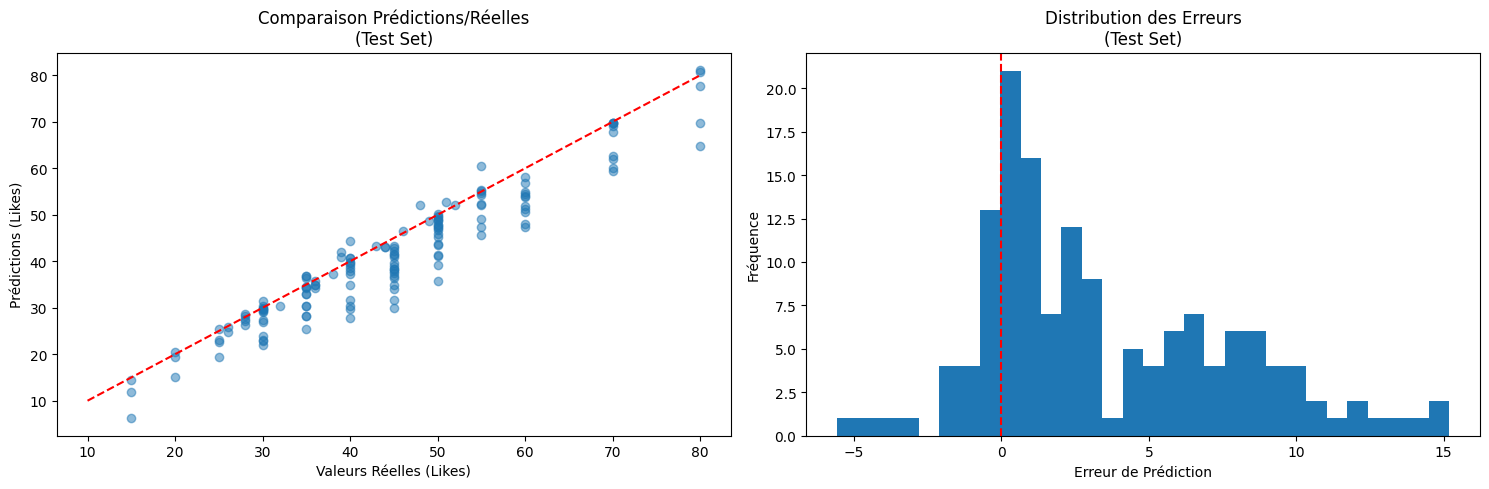

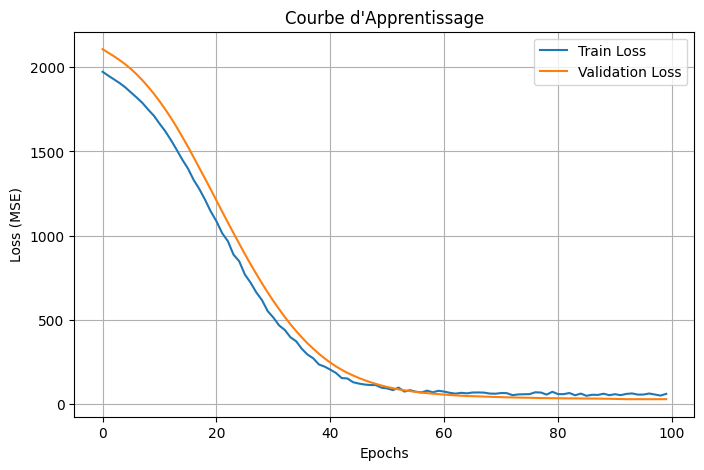

In [47]:
target = 'Likes'
X = df.drop(columns=[target, 'Text', 'User', 'Hashtags', 'Timestamp', 'Unnamed: 0'])  # Exclusion explicite
y = df[target]

# 3. Séparation initiale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Définition des features
numeric_features = ['Retweets', 'Year', 'Month', 'Day', 'Hour']
categorical_features = ['Sentiment', 'Platform', 'Country']  # Ajout de Country

# 5. Préprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 6. Création du pipeline complet
pipeline = make_pipeline(
    preprocessor
)

# Application du preprocessing
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# 7. Construction du modèle (version simplifiée)
input_shape = X_train_processed.shape[1]
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# 8. Entraînement avec callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True)

history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# 9. Prédictions et évaluation
def evaluate_model(X, y):
    predictions = model.predict(X).flatten()
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r2 = r2_score(y, predictions)
    return rmse, r2, predictions

train_rmse, train_r2, _ = evaluate_model(X_train_processed, y_train)
test_rmse, test_r2, test_predictions = evaluate_model(X_test_processed, y_test)

# 10. Affichage des résultats
print("\n" + "="*60)
print(" PERFORMANCE DU MODÈLE ".center(60))
print("="*60)
print(f"{'Ensemble':<15} | {'RMSE':>10} | {'R²':>10}")
print("-"*60)
print(f"{'Train':<15} | {train_rmse:>10.2f} | {train_r2:>10.4f}")
print(f"{'Test':<15} | {test_rmse:>10.2f} | {test_r2:>10.4f}")
print("="*60)

# 11. Visualisation
plt.figure(figsize=(15, 5))

# Prédictions vs Réelles
plt.subplot(1, 2, 1)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valeurs Réelles (Likes)')
plt.ylabel('Prédictions (Likes)')
plt.title('Comparaison Prédictions/Réelles\n(Test Set)')

# Distribution des erreurs
plt.subplot(1, 2, 2)
errors = y_test - test_predictions
plt.hist(errors, bins=30)
plt.xlabel('Erreur de Prédiction')
plt.ylabel('Fréquence')
plt.title('Distribution des Erreurs\n(Test Set)')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# 12. Courbe d'apprentissage
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Courbe d\'Apprentissage')
plt.grid(True)
plt.show()